In [2]:
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

In [3]:
tf.__version__

'2.4.1'

In [4]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy
from keras import models,layers
from keras.utils import to_categorical
from keras import optimizers

In [5]:
# loading the dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [6]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [7]:
labels=['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
1+2

3

[4]


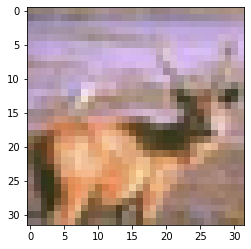

In [12]:
#explore data
print(ytrain[9000])
plt.imshow(xtrain[9000])
plt.show()

In [13]:
xtrain.dtype

dtype('uint8')

In [14]:
# conver the pixel values in float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
# scale the images
xtrain /= 255  # ths is eqvalent to xtrain = xtrain/255 
xtest /= 255

In [15]:
# Convert class vectors to binary class matrices.
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)


(50000, 10)
(10000, 10)


In [16]:
ytrain[2000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
print(xtrain[10])

[[[0.20784314 0.25490198 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078432 0.1764706  0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078432]
  [0.20784314 0.24313726 0.1764706 ]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470589 0.18039216 0.1764706 ]
  [0.15294118 0.16862746 0.16470589]
  [0.10980392 0.1254902  0.12156863]]

 [[0.1764706  0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078432]
  [0.18039216 0.20392157 0.13333334]
  ...
  [0.14901961 0.16470589 0.16078432]
  [0.14117648 0.15686275 0.15294118]
  [0.11372549 0.12941177 0.1254902 ]]

 ...

 [[0.2784314  0.3254902  0.25882354]
  [0.2901961  0.3254902  0.25882354]
  [0.3137255  0.33333334 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941177]
  [0.18039216 0.19215687 0.13333334]
  [0.19215687 0.19607843 0.16078432]]

 [[0.29411766 0.32156864 0.2627451 ]
  [0.30980393 0.33333334 0.27058825]


In [18]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (32,32,3)))  # it converts a 2D image (eg. 12,12) into a 1D vector (1,144)
model.add(layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', \
                       bias_initializer='zeros', kernel_regularizer='l2')) # Adding a hidden layer with 512 neurons, fully connected layer

model.add(layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', \
                       bias_initializer='zeros', kernel_regularizer='l2')) # Adding a hidden layer with 512 neurons, fully connected layer

model.add(layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', \
                       bias_initializer='zeros', kernel_regularizer='l2')) # Adding a hidden layer with 512 neurons, fully connected layer

model.add(layers.Dense(10, activation='softmax'))  # this is the actual output layer

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [22]:
3072*512 + 512

1573376

In [23]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(xtrain, ytrain, validation_split=0.1, verbose=True, epochs=50, batch_size=1000)

Epoch 1/50
45/45 [==============================] - 8s 146ms/step - loss: 10.7747 - accuracy: 0.1695 - val_loss: 4.5534 - val_accuracy: 0.3008
Epoch 2/50
45/45 [==============================] - 4s 97ms/step - loss: 3.9244 - accuracy: 0.3080 - val_loss: 2.8402 - val_accuracy: 0.3186
Epoch 3/50
45/45 [==============================] - 4s 97ms/step - loss: 2.6998 - accuracy: 0.3250 - val_loss: 2.4200 - val_accuracy: 0.3262
Epoch 4/50
45/45 [==============================] - 4s 99ms/step - loss: 2.3640 - accuracy: 0.3390 - val_loss: 2.2535 - val_accuracy: 0.3428
Epoch 5/50
45/45 [==============================] - 5s 101ms/step - loss: 2.2170 - accuracy: 0.3547 - val_loss: 2.1645 - val_accuracy: 0.3460
Epoch 6/50
45/45 [==============================] - 5s 112ms/step - loss: 2.1352 - accuracy: 0.3672 - val_loss: 2.1146 - val_accuracy: 0.3644
Epoch 7/50
45/45 [==============================] - 5s 119ms/step - loss: 2.0784 - accuracy: 0.3722 - val_loss: 2.0705 - val_accuracy: 0.3692
Epoch 8/

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

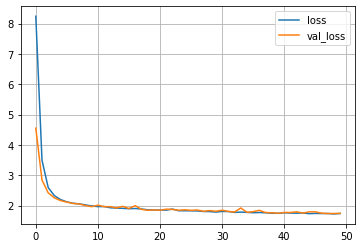

In [26]:
history.history.keys()
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid('on')
plt.show()

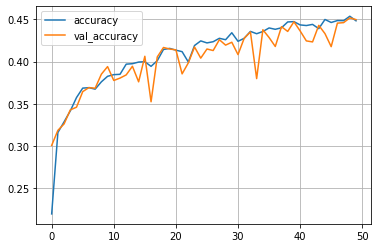

In [27]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.show()

In [28]:
ytrain[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=xtrain.shape[1:], activation='relu', \
                        kernel_regularizer=None))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer='my_regularizer'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Dropout(0.25)) # Drops 25% pixels, which are not important.

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=None))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=None))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Dropout(0.25))

model.add(layers.Flatten())  # it converts a 2D image (eg. 12,12) into a 1D vector (1,144)

model.add(layers.Dense(64, activation='relu')) # Adding a hidden layer with 512 neurons, fully connected layer
model.add(layers.Dense(64, activation='relu')) # Adding a hidden layer with 512 neurons, fully connected layer
# model.add(layers.Dropout(0.25))

model.add(layers.Dense(10, activation='softmax'))  # this is the actual output layer

# initiate RMSprop optimizer
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [42]:
history = model.fit(xtrain, ytrain, validation_split=0.1, verbose=1, epochs=50,batch_size=1000)

Epoch 1/50
45/45 [==============================] - 135s 3s/step - loss: 2.2863 - accuracy: 0.1333 - val_loss: 2.1975 - val_accuracy: 0.2044
Epoch 2/50
45/45 [==============================] - 102s 2s/step - loss: 2.1589 - accuracy: 0.2111 - val_loss: 2.0591 - val_accuracy: 0.2650
Epoch 3/50
45/45 [==============================] - 94s 2s/step - loss: 2.0447 - accuracy: 0.2685 - val_loss: 1.9821 - val_accuracy: 0.2928
Epoch 4/50
45/45 [==============================] - 92s 2s/step - loss: 1.9790 - accuracy: 0.2958 - val_loss: 1.9281 - val_accuracy: 0.3144
Epoch 5/50
45/45 [==============================] - 97s 2s/step - loss: 1.9286 - accuracy: 0.3133 - val_loss: 1.8799 - val_accuracy: 0.3302
Epoch 6/50
45/45 [==============================] - 104s 2s/step - loss: 1.8725 - accuracy: 0.3328 - val_loss: 1.8296 - val_accuracy: 0.3508
Epoch 7/50
 9/45 [=====>........................] - ETA: 1:09 - loss: 1.8385 - accuracy: 0.3461

KeyboardInterrupt: 

In [48]:
# check performance on test
scores = model.evaluate(xtest, ytest, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 187us/step
Test loss: 0.9802896227836609
Test accuracy: 0.6547999978065491


So the model's final accuracy on the TEST data is 69%